This notebook compares the fraction of k<sub>aa</sub>-mer reads that mapped to the roary pangenome or the metabat pangenome in nucleotide or amino acid space.

More reads map in amino acid space, indicating that the k<sub>aa</sub>-mer metapangenomes capture more real content than the other two methods.

The parsing problems come from irregular spacing in the `*stat` files. 
They don't cause any problems for the data we're plotting here, so they can be ignored.

In [1]:
setwd("..")

In [3]:
library(purrr)
library(dplyr)
library(readr)
library(ggplot2)
library(tidyr)

## Nucleotide mapping rates for different metapangenome construction methods

In [4]:
starting_reads <- Sys.glob("outputs/orpheum_species_map/00_roary_nucleotide/*stat") %>%
  set_names() %>%
  map_dfr(read_tsv, col_names = c("stat", "total_reads", "comment"), col_types = "cc", .id = "sample") %>%
  mutate(total_reads = as.numeric(gsub("\t.*", "", total_reads))) %>%
  mutate(sample = basename(sample),
         sample = gsub("\\.stat", "", sample)) %>%
  separate(sample, into = c("tmp", "species"), sep = "-s__") %>%
  separate(tmp, into = c("sample", "accession"), sep = "-") %>%
  mutate(stat = gsub(":", "", stat)) %>%
  filter(stat %in% c("raw total sequences")) %>%
  select(-stat)

Warning message:
“One or more parsing issues, see `problems()` for details”
Warning message:
“One or more parsing issues, see `problems()` for details”
Warning message:
“One or more parsing issues, see `problems()` for details”
Warning message:
“One or more parsing issues, see `problems()` for details”
Warning message:
“One or more parsing issues, see `problems()` for details”
Warning message:
“One or more parsing issues, see `problems()` for details”
Warning message:
“One or more parsing issues, see `problems()` for details”
Warning message:
“One or more parsing issues, see `problems()` for details”
Warning message:
“One or more parsing issues, see `problems()` for details”
Warning message:
“One or more parsing issues, see `problems()` for details”
Warning message:
“One or more parsing issues, see `problems()` for details”
Warning message:
“One or more parsing issues, see `problems()` for details”
Warning message:
“One or more parsing issues, see `problems()` for details”
Warning mess

In [5]:
roary_nucleotide <- Sys.glob("outputs/orpheum_species_map/00_roary_nucleotide/*stat") %>%
  set_names() %>%
  map_dfr(read_tsv, col_names = c("stat", "value", "comment"), col_types = "cc", .id = "sample") %>%
  mutate(value = as.numeric(gsub("\t.*", "", value))) %>%
  mutate(sample = basename(sample),
         sample = gsub("\\.stat", "", sample),
         set = "roary") %>%
  separate(sample, into = c("tmp", "species"), sep = "-s__") %>%
  separate(tmp, into = c("sample", "accession"), sep = "-") %>%
  mutate(stat = gsub(":", "", stat))

Warning message:
“One or more parsing issues, see `problems()` for details”
Warning message:
“One or more parsing issues, see `problems()` for details”
Warning message:
“One or more parsing issues, see `problems()` for details”
Warning message:
“One or more parsing issues, see `problems()` for details”
Warning message:
“One or more parsing issues, see `problems()` for details”
Warning message:
“One or more parsing issues, see `problems()` for details”
Warning message:
“One or more parsing issues, see `problems()` for details”
Warning message:
“One or more parsing issues, see `problems()` for details”
Warning message:
“One or more parsing issues, see `problems()` for details”
Warning message:
“One or more parsing issues, see `problems()` for details”
Warning message:
“One or more parsing issues, see `problems()` for details”
Warning message:
“One or more parsing issues, see `problems()` for details”
Warning message:
“One or more parsing issues, see `problems()` for details”
Warning mess

In [6]:
roary_nucleotide <- roary_nucleotide %>%
  filter(stat %in% c("reads mapped"))

In [7]:
metabat_nucleotide <- Sys.glob("outputs/orpheum_species_map/02_metabat_nucleotide/*stat") %>%
  set_names() %>%
  map_dfr(read_tsv, col_names = c("stat", "value", "comment"), col_types = "cc", .id = "sample") %>%
  mutate(value = as.numeric(gsub("\t.*", "", value))) %>%
  mutate(sample = basename(sample),
         sample = gsub("\\.stat", "", sample),
         set = "metabat") %>%
  separate(sample, into = c("tmp", "species"), sep = "-s__") %>%
  separate(tmp, into = c("sample", "accession"), sep = "-") %>%
  mutate(stat = gsub(":", "", stat))

Warning message:
“One or more parsing issues, see `problems()` for details”
Warning message:
“One or more parsing issues, see `problems()` for details”
Warning message:
“One or more parsing issues, see `problems()` for details”
Warning message:
“One or more parsing issues, see `problems()` for details”
Warning message:
“One or more parsing issues, see `problems()` for details”
Warning message:
“One or more parsing issues, see `problems()` for details”
Warning message:
“One or more parsing issues, see `problems()` for details”
Warning message:
“One or more parsing issues, see `problems()` for details”
Warning message:
“One or more parsing issues, see `problems()` for details”
Warning message:
“One or more parsing issues, see `problems()` for details”
Warning message:
“One or more parsing issues, see `problems()` for details”
Warning message:
“One or more parsing issues, see `problems()` for details”
Warning message:
“One or more parsing issues, see `problems()` for details”
Warning mess

In [8]:
metabat_nucleotide <- metabat_nucleotide %>%
  filter(stat %in% c("reads mapped", "reads unmapped"))

In [11]:
# join together
nucleotide <- bind_rows(roary_nucleotide, metabat_nucleotide) %>%
  left_join(starting_reads) %>%
  mutate(set = ifelse(stat == "reads unmapped", "kaa-mer", set)) %>%
  mutate(fraction = value / total_reads) %>%
  mutate(type = "nucleotide")

Joining, by = c("sample", "accession", "species")


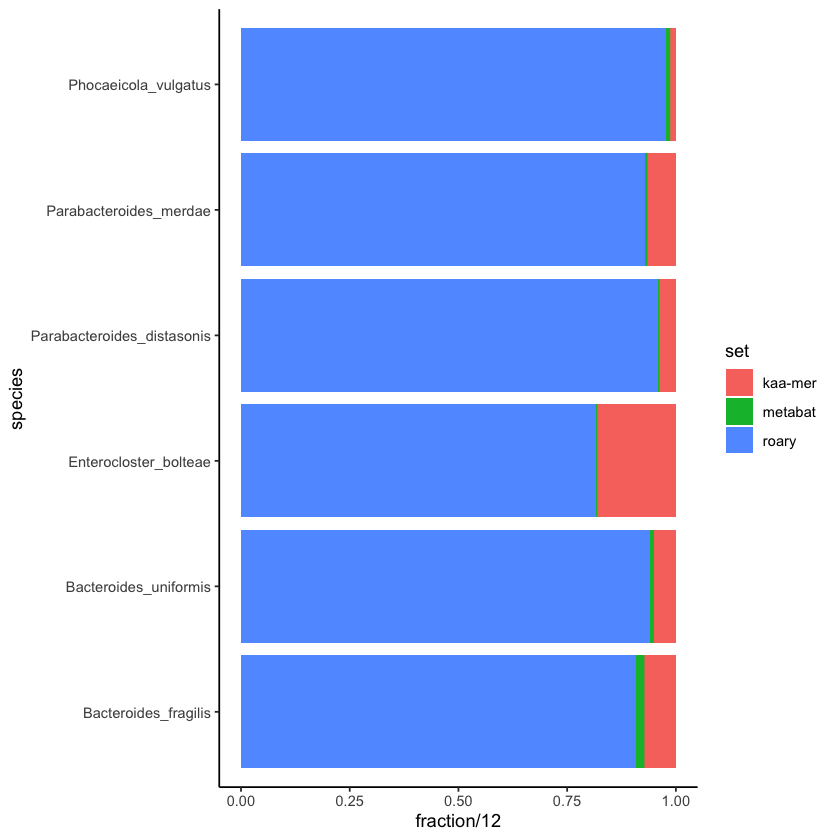

In [10]:
ggplot(nucleotide, aes(x = species, y = fraction/12, fill = set)) +
  geom_col() +
  theme_classic() + coord_flip()

## Amino acid mapping rates for different metapangenome construction methods

In [12]:
roary_aa <- Sys.glob("outputs/orpheum_species_map/00_roary_aminoacid/*stat") %>%
  set_names() %>%
  map_dfr(read_tsv, col_names = c("stat", "value", "comment"), col_types = "cc", .id = "sample") %>%
  mutate(value = as.numeric(gsub("\t.*", "", value))) %>%
  mutate(sample = basename(sample),
         sample = gsub("\\.stat", "", sample),
         set = "roary") %>%
  separate(sample, into = c("tmp", "species"), sep = "-s__") %>%
  separate(tmp, into = c("sample", "accession"), sep = "-") %>%
  mutate(stat = gsub(":", "", stat))

Warning message:
“One or more parsing issues, see `problems()` for details”
Warning message:
“One or more parsing issues, see `problems()` for details”
Warning message:
“One or more parsing issues, see `problems()` for details”
Warning message:
“One or more parsing issues, see `problems()` for details”
Warning message:
“One or more parsing issues, see `problems()` for details”
Warning message:
“One or more parsing issues, see `problems()` for details”
Warning message:
“One or more parsing issues, see `problems()` for details”
Warning message:
“One or more parsing issues, see `problems()` for details”
Warning message:
“One or more parsing issues, see `problems()` for details”
Warning message:
“One or more parsing issues, see `problems()` for details”
Warning message:
“One or more parsing issues, see `problems()` for details”
Warning message:
“One or more parsing issues, see `problems()` for details”
Warning message:
“One or more parsing issues, see `problems()` for details”
Warning mess

In [14]:
roary_aa <- roary_aa %>%
  filter(stat %in% c("reads mapped"))

In [15]:
metabat_aa <- Sys.glob("outputs/orpheum_species_map/02_metabat_aminoacid/*stat") %>%
  set_names() %>%
  map_dfr(read_tsv, col_names = c("stat", "value", "comment"), col_types = "cc", .id = "sample") %>%
  mutate(value = as.numeric(gsub("\t.*", "", value))) %>%
  mutate(sample = basename(sample),
         sample = gsub("\\.stat", "", sample),
         set = "metabat") %>%
  separate(sample, into = c("tmp", "species"), sep = "-s__") %>%
  separate(tmp, into = c("sample", "accession"), sep = "-") %>%
  mutate(stat = gsub(":", "", stat))

Warning message:
“One or more parsing issues, see `problems()` for details”
Warning message:
“One or more parsing issues, see `problems()` for details”
Warning message:
“One or more parsing issues, see `problems()` for details”
Warning message:
“One or more parsing issues, see `problems()` for details”
Warning message:
“One or more parsing issues, see `problems()` for details”
Warning message:
“One or more parsing issues, see `problems()` for details”
Warning message:
“One or more parsing issues, see `problems()` for details”
Warning message:
“One or more parsing issues, see `problems()` for details”
Warning message:
“One or more parsing issues, see `problems()` for details”
Warning message:
“One or more parsing issues, see `problems()` for details”
Warning message:
“One or more parsing issues, see `problems()` for details”
Warning message:
“One or more parsing issues, see `problems()` for details”
Warning message:
“One or more parsing issues, see `problems()` for details”
Warning mess

In [16]:
metabat_aa <- metabat_aa %>%
  filter(stat %in% c("reads mapped", "reads unmapped"))

In [17]:
# join together
aa <- bind_rows(roary_aa, metabat_aa) %>%
  left_join(starting_reads) %>%
  mutate(set = ifelse(stat == "reads unmapped", "kaa-mer", set)) %>%
  mutate(fraction = value / total_reads) %>%
  mutate(type = "amino acid")

Joining, by = c("sample", "accession", "species")


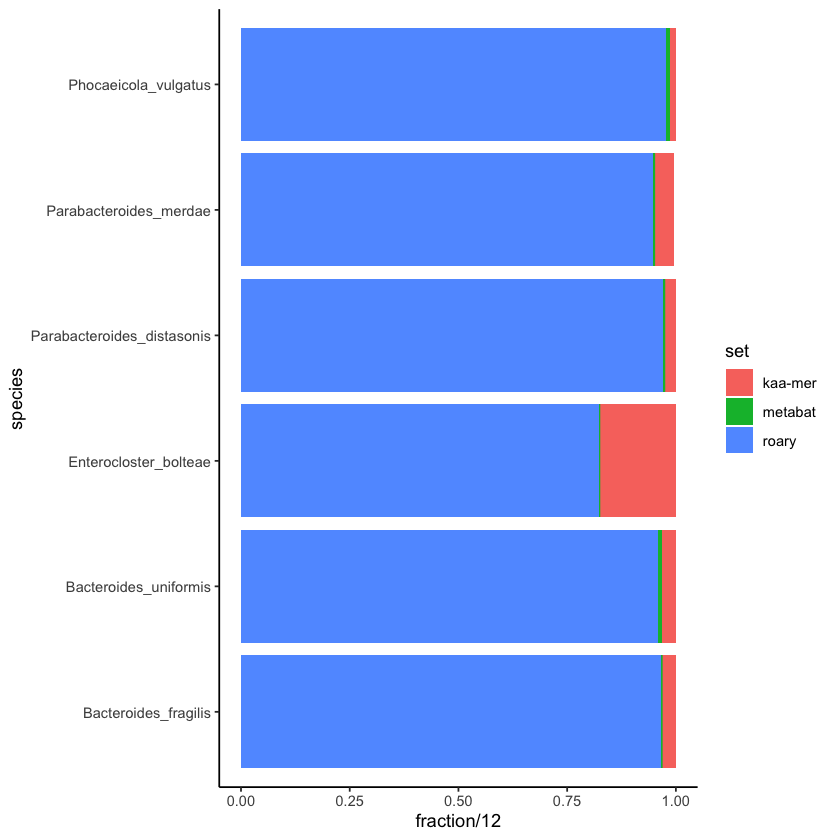

In [18]:
ggplot(aa, aes(x = species, y = fraction/12, fill = set)) +
  geom_col() +
  theme_classic() + coord_flip()

## Combine information together and visualize

In [19]:
all <- bind_rows(nucleotide, aa)%>%
  mutate(type = factor(type, levels = c("nucleotide", "amino acid")),
         line_label = paste0(sample, "-", species))

In [20]:
all_tmp <- all %>%
  group_by(species, set, type) %>%
  summarize(mean_fraction = mean(fraction)) %>%
  arrange(desc(mean_fraction)) %>%
  mutate(mean_fraction_label = ifelse(set %in% c("kaa-mer", "roary"), round(mean_fraction, digits = 2), NA))

`summarise()` has grouped output by 'species', 'set'. You can override using the `.groups` argument.


Warning message:
“Removed 12 rows containing missing values (geom_text).”


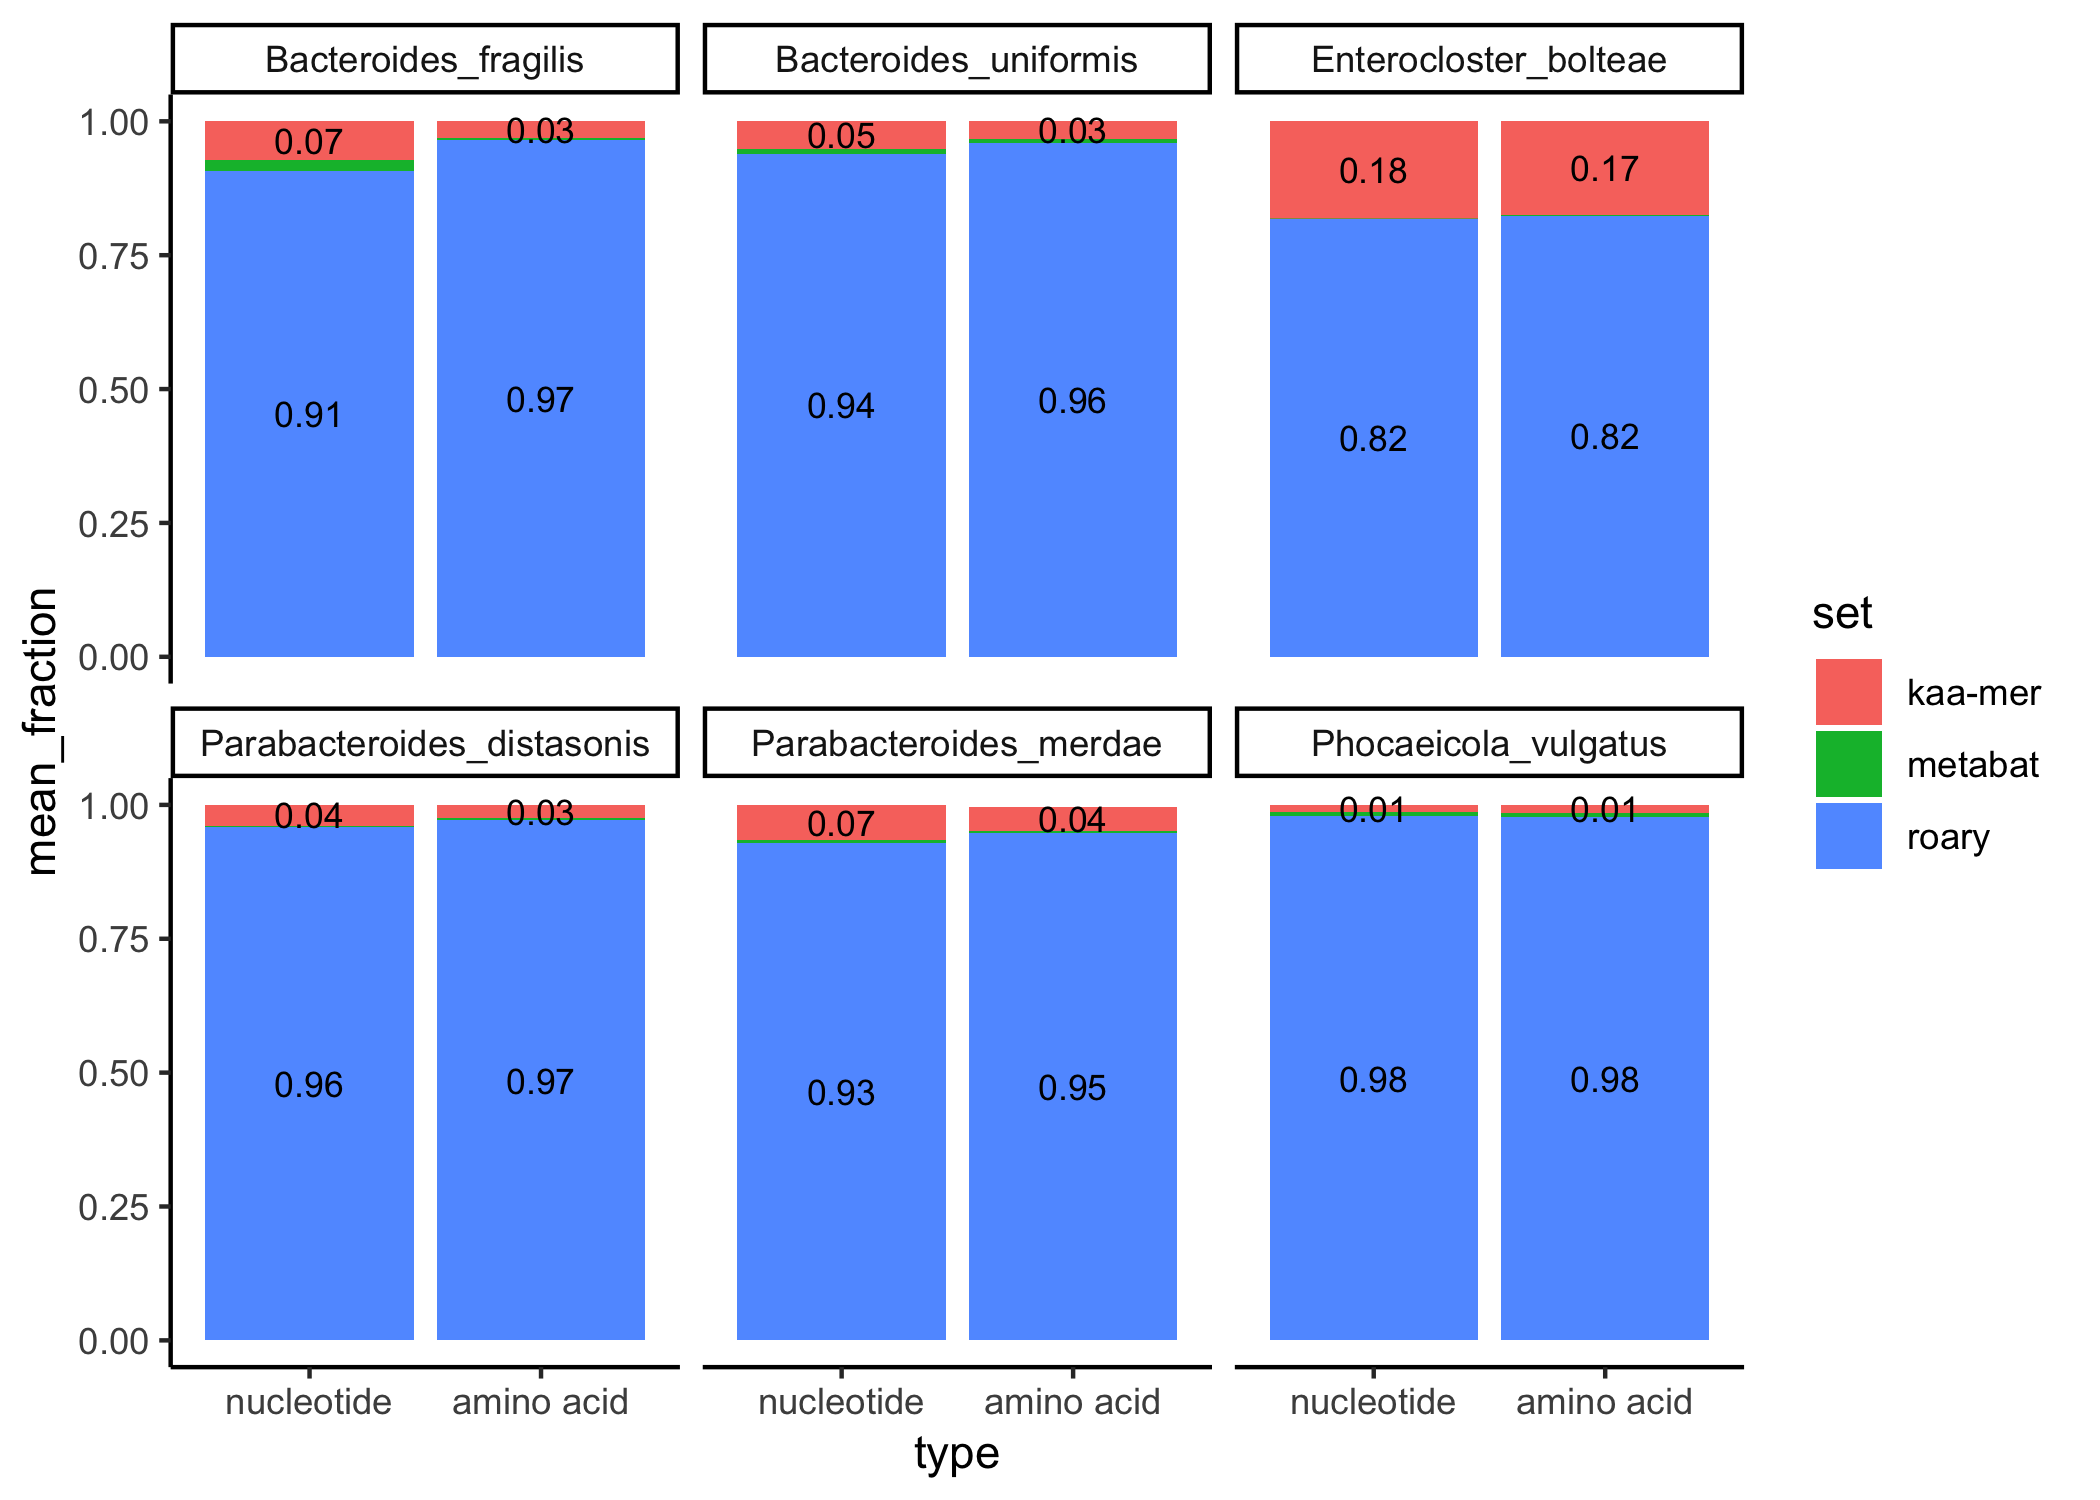

In [30]:
# adjust plot size rendered inline
options(repr.plot.width = 7, repr.plot.height = 5, repr.plot.res = 300)

ggplot(all_tmp, aes(x = type, y = mean_fraction, fill = set, label = mean_fraction_label)) +
  geom_col() +
  theme_classic() + # coord_flip() +
  facet_wrap(~species) +
  geom_text(position = position_stack(vjust = .5), size = 3)

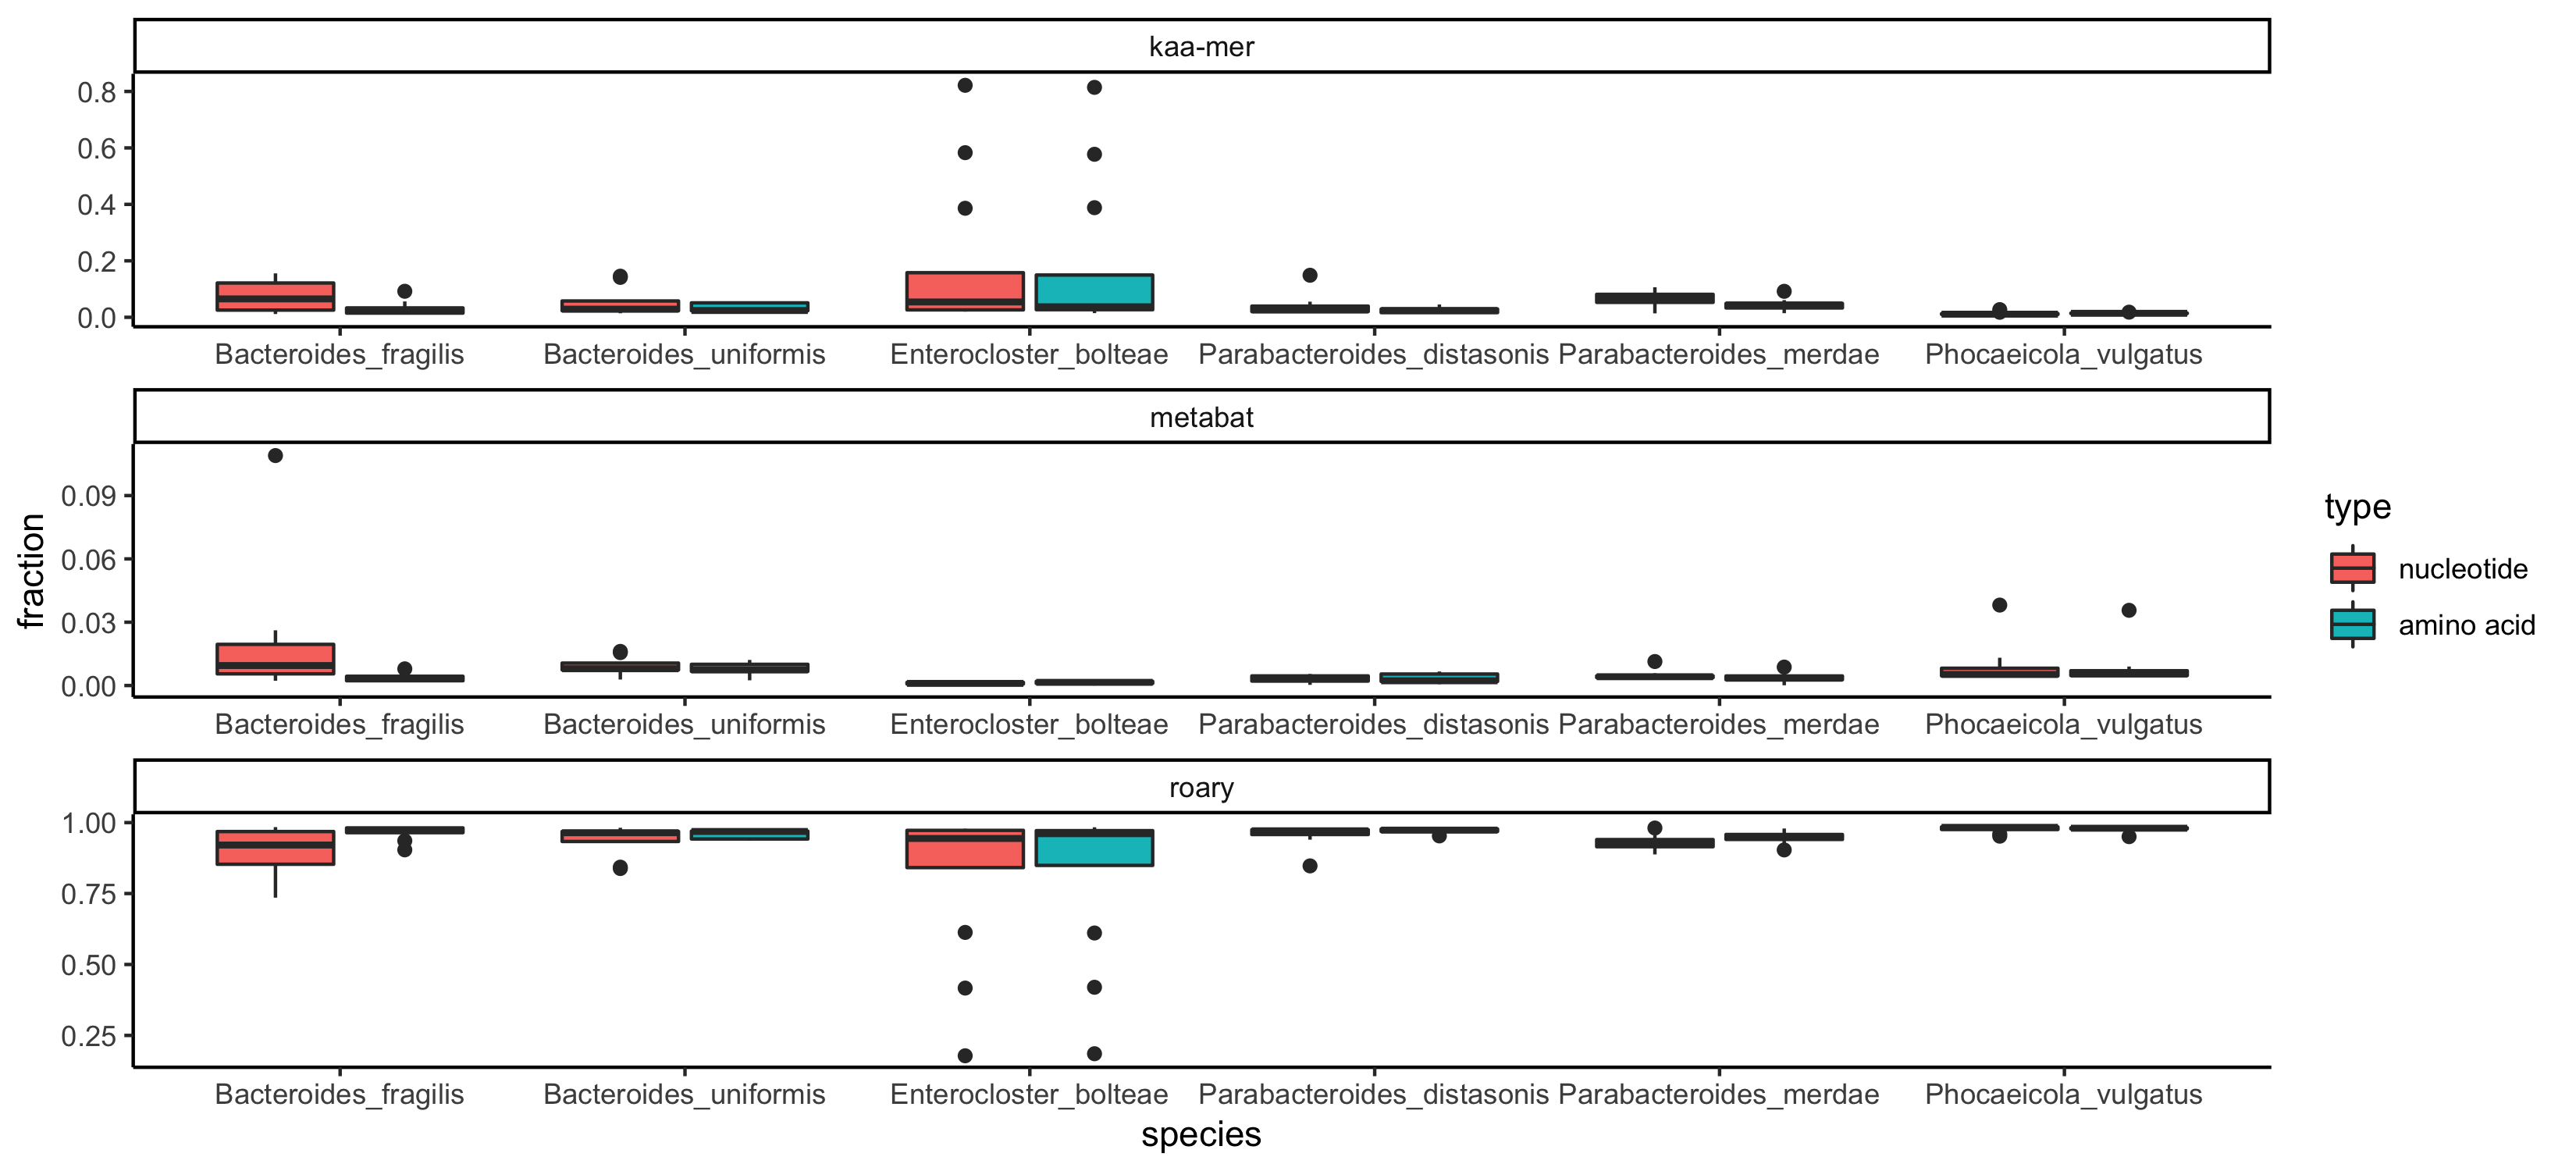

In [28]:
# adjust plot size rendered inline
options(repr.plot.width = 11, repr.plot.height = 5, repr.plot.res = 300)

ggplot(all, aes(x = species, y = fraction, fill = type)) +
  geom_boxplot() +
  theme_classic() +
  facet_wrap(~set, nrow = 3, scales = "free") 